## Import, Loading, and Scaling

In [94]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('POS_CASH_balance.csv')
numeric_feats = ['CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'MONTHS_BALANCE']

# Scaling the numeric feats using StandardScaler
scaler = StandardScaler()
data[numeric_feats] = scaler.fit_transform(data[numeric_feats])

print(data[numeric_feats].head())

   CNT_INSTALMENT  CNT_INSTALMENT_FUTURE  MONTHS_BALANCE
0        2.576924               3.107029        0.153936
1        1.576512               2.206862        0.077210
2       -0.424312              -0.133570        0.115573
3        2.576924               2.836979        0.000483
4        1.576512               2.206862        0.000483


In [96]:
data.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
MONTHS_BALANCE               0
CNT_INSTALMENT           26071
CNT_INSTALMENT_FUTURE    26087
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         float64
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 610.4+ MB


In [14]:
data.shape

(10001358, 8)

In [16]:
data.tail(5)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
10001353,2448283,226558,0.575933,-0.924518,-0.94372,Active,843,0
10001354,1717234,141565,0.614296,-0.424312,-0.94372,Active,602,0
10001355,1283126,315695,0.537569,-0.591048,-0.94372,Active,609,0
10001356,1082516,450255,0.499206,-0.424312,-0.94372,Active,614,0
10001357,1259607,174278,-0.651693,-0.090842,-0.94372,Completed,0,0


## Handle Missing Values

### Check for Other CSVs According to Hierarchy for Potential Handle of Missing Values (found none)

In [6]:
installments = pd.read_csv('installments_payments.csv')
installments.head(5)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [16]:
credit = pd.read_csv('credit_card_balance.csv')
credit.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

In [18]:
previous = pd.read_csv('previous_application.csv')
previous.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

### Using Mean for Missing Values

In [98]:
# Filling missing values with the mean of each feature
data['CNT_INSTALMENT'].fillna(data['CNT_INSTALMENT'].mean(), inplace=True)
data['CNT_INSTALMENT_FUTURE'].fillna(data['CNT_INSTALMENT_FUTURE'].mean(), inplace=True)

data[['CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE']].isnull().sum()

CNT_INSTALMENT           0
CNT_INSTALMENT_FUTURE    0
dtype: int64

## Duplicated Data

In [100]:
data.duplicated().sum()

0

## Visualization, Outliers, and Log Transformation

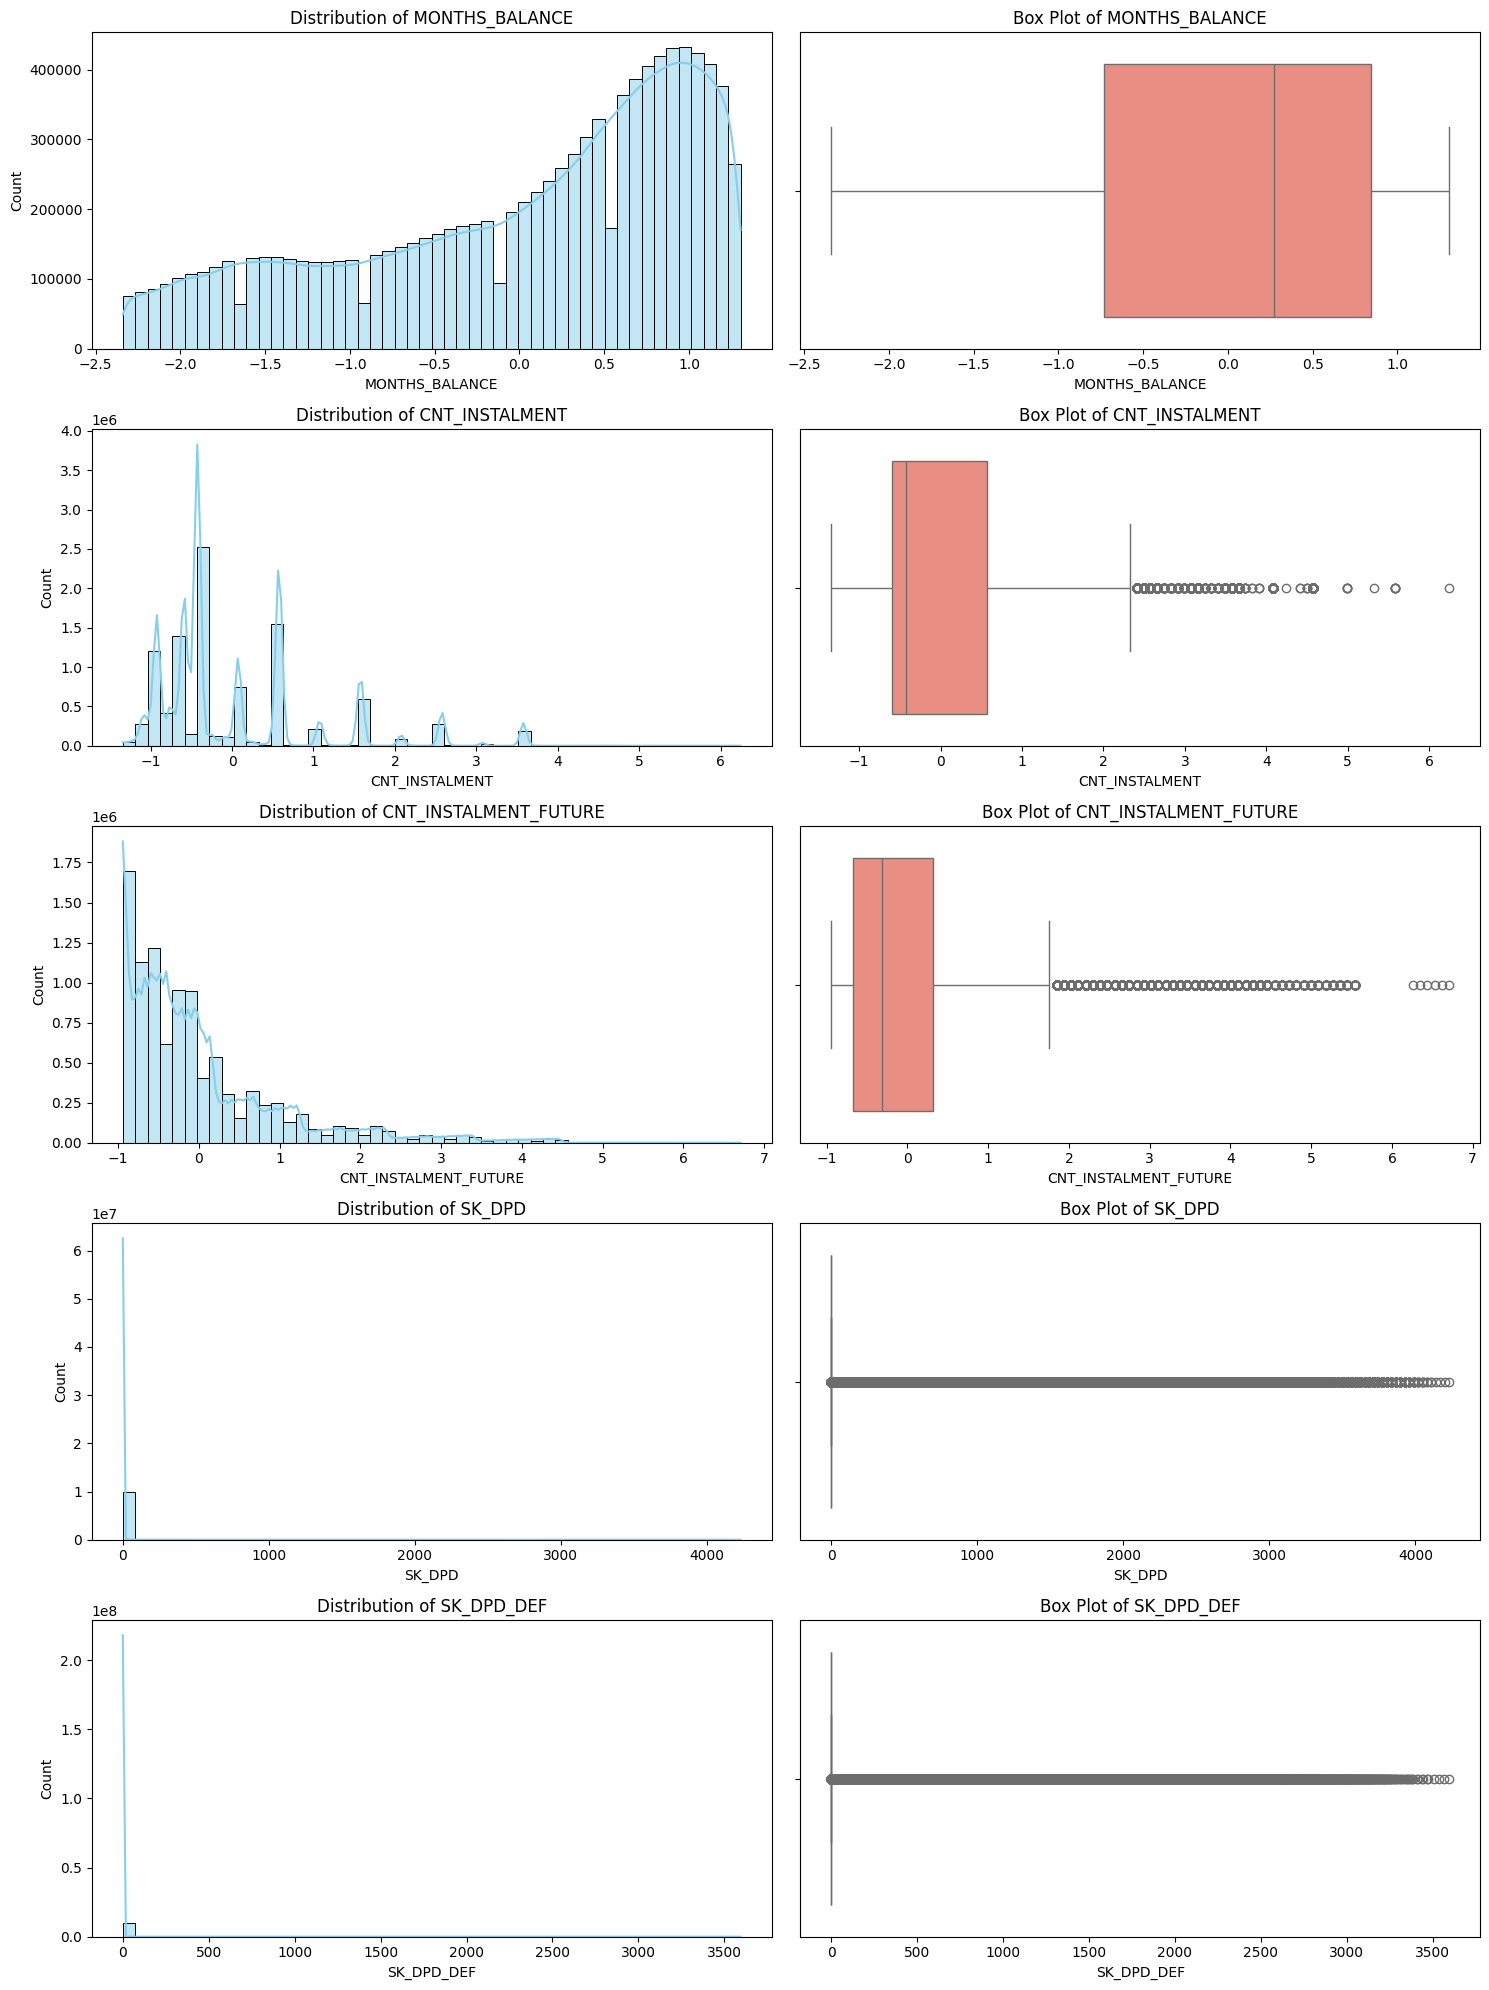

MONTHS_BALANCE           -0.672777
CNT_INSTALMENT            1.603826
CNT_INSTALMENT_FUTURE     1.849159
SK_DPD                   14.899126
SK_DPD_DEF               66.339906
dtype: float64

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution and boxplot for each feature to check skewness and outliers
features = ['MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF']

plt.figure(figsize=(15, 20))
for i, feature in enumerate(features, 1):
    # Distribution Plot
    plt.subplot(5, 2, 2*i - 1)
    sns.histplot(data[feature], kde=True, color='skyblue', bins=50)
    plt.title(f'Distribution of {feature}')
    
    # Box Plot
    plt.subplot(5, 2, 2*i)
    sns.boxplot(x=data[feature], color='salmon')
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

# Calculating skewness
skewness = data[features].skew()
skewness

In [104]:
import numpy as np

# Outliers will be handled by capping at the 1st and 99th percentiles for specified features.
# Define features for outlier handling and log transformation
outlier_features = ['MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE']

# Handle outliers by capping at 1st and 99th percentiles
for feature in outlier_features:
    lower_cap = data[feature].quantile(0.01)
    upper_cap = data[feature].quantile(0.99)
    data[feature] = data[feature].clip(lower=lower_cap, upper=upper_cap)

## Adding Features

In [106]:
# 1. remaining_instalment_pct
# Persentase cicilan yang tersisa
data['remaining_instalment_pct'] = data['CNT_INSTALMENT_FUTURE'] / data['CNT_INSTALMENT']

# 2. credit_duration
# Durasi kredit berdasarkan perbedaan antara `MONTHS_BALANCE` tertinggi dan terendah
# Misalkan ini per customer, perlu pengelompokan per customer untuk real data
data['credit_duration'] = data.groupby('SK_ID_PREV')['MONTHS_BALANCE'].transform(lambda x: x.max() - x.min())

# 3. months_since_last_payment
# Jumlah bulan sejak pembayaran terakhir
data['months_since_last_payment'] = data.groupby('SK_ID_PREV')['MONTHS_BALANCE'].transform('max') - data['MONTHS_BALANCE']

In [108]:
features = ['MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF', 
            'remaining_instalment_pct', 'credit_duration', 'months_since_last_payment']

## More Outliers

In [110]:
# Define features with extreme skewness for outlier handling
outlier_features = ['SK_DPD', 'SK_DPD_DEF', 'credit_duration', 'months_since_last_payment']

# Cap outliers at the 1st and 99th percentiles
for feature in outlier_features:
    lower_cap = data[feature].quantile(0.01)
    upper_cap = data[feature].quantile(0.99)
    data[feature] = data[feature].clip(lower=lower_cap, upper=upper_cap)

# Verify that outliers are handled
print("Summary after outlier handling:")
print(data[outlier_features].describe())

Summary after outlier handling:
             SK_DPD    SK_DPD_DEF  credit_duration  months_since_last_payment
count  1.000136e+07  1.000136e+07     1.000136e+07               1.000136e+07
mean   2.857339e+00  1.139535e-02     5.355935e-01               2.606731e-01
std    2.453244e+01  1.061391e-01     4.277384e-01               2.607708e-01
min    0.000000e+00  0.000000e+00     7.672663e-02               0.000000e+00
25%    0.000000e+00  0.000000e+00     3.069065e-01               7.672663e-02
50%    0.000000e+00  0.000000e+00     4.219965e-01               1.918166e-01
75%    0.000000e+00  0.000000e+00     6.521764e-01               3.452698e-01
max    2.350000e+02  1.000000e+00     3.069065e+00               1.496169e+00


In [112]:
# Existing features for log transformation
log_transform_features = ['CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE']

# Additional features based on skewness
additional_log_transform_features = ['SK_DPD', 'SK_DPD_DEF', 'credit_duration', 'months_since_last_payment']
log_transform_features.extend(additional_log_transform_features)

# Apply log transformation
for feature in log_transform_features:
    data[f"{feature}_LOG"] = np.log1p(data[feature])  # log1p to handle zero and negative values

# Summary to confirm transformations
print("Summary after log transformation:")
print(data[[f"{feature}_LOG" for feature in log_transform_features]].describe())

C:\Users\brama\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Summary after log transformation:
       CNT_INSTALMENT_LOG  CNT_INSTALMENT_FUTURE_LOG    SK_DPD_LOG  \
count        9.531844e+06               1.000136e+07  1.000136e+07   
mean        -4.090258e-01              -5.397324e-01  1.007718e-01   
std          1.053312e+00               1.167426e+00  6.540996e-01   
min         -2.583868e+00              -2.877418e+00  0.000000e+00   
25%         -8.941569e-01              -1.119847e+00  0.000000e+00   
50%         -5.521901e-01              -3.763000e-01  0.000000e+00   
75%          4.549533e-01               2.749865e-01  0.000000e+00   
max          1.521117e+00               1.555435e+00  5.463832e+00   

       SK_DPD_DEF_LOG  credit_duration_LOG  months_since_last_payment_LOG  
count    1.000136e+07         1.000136e+07                   1.000136e+07  
mean     7.898656e-03         4.013118e-01                   2.138566e-01  
std      7.356999e-02         2.190732e-01                   1.811264e-01  
min      0.000000e+00         7

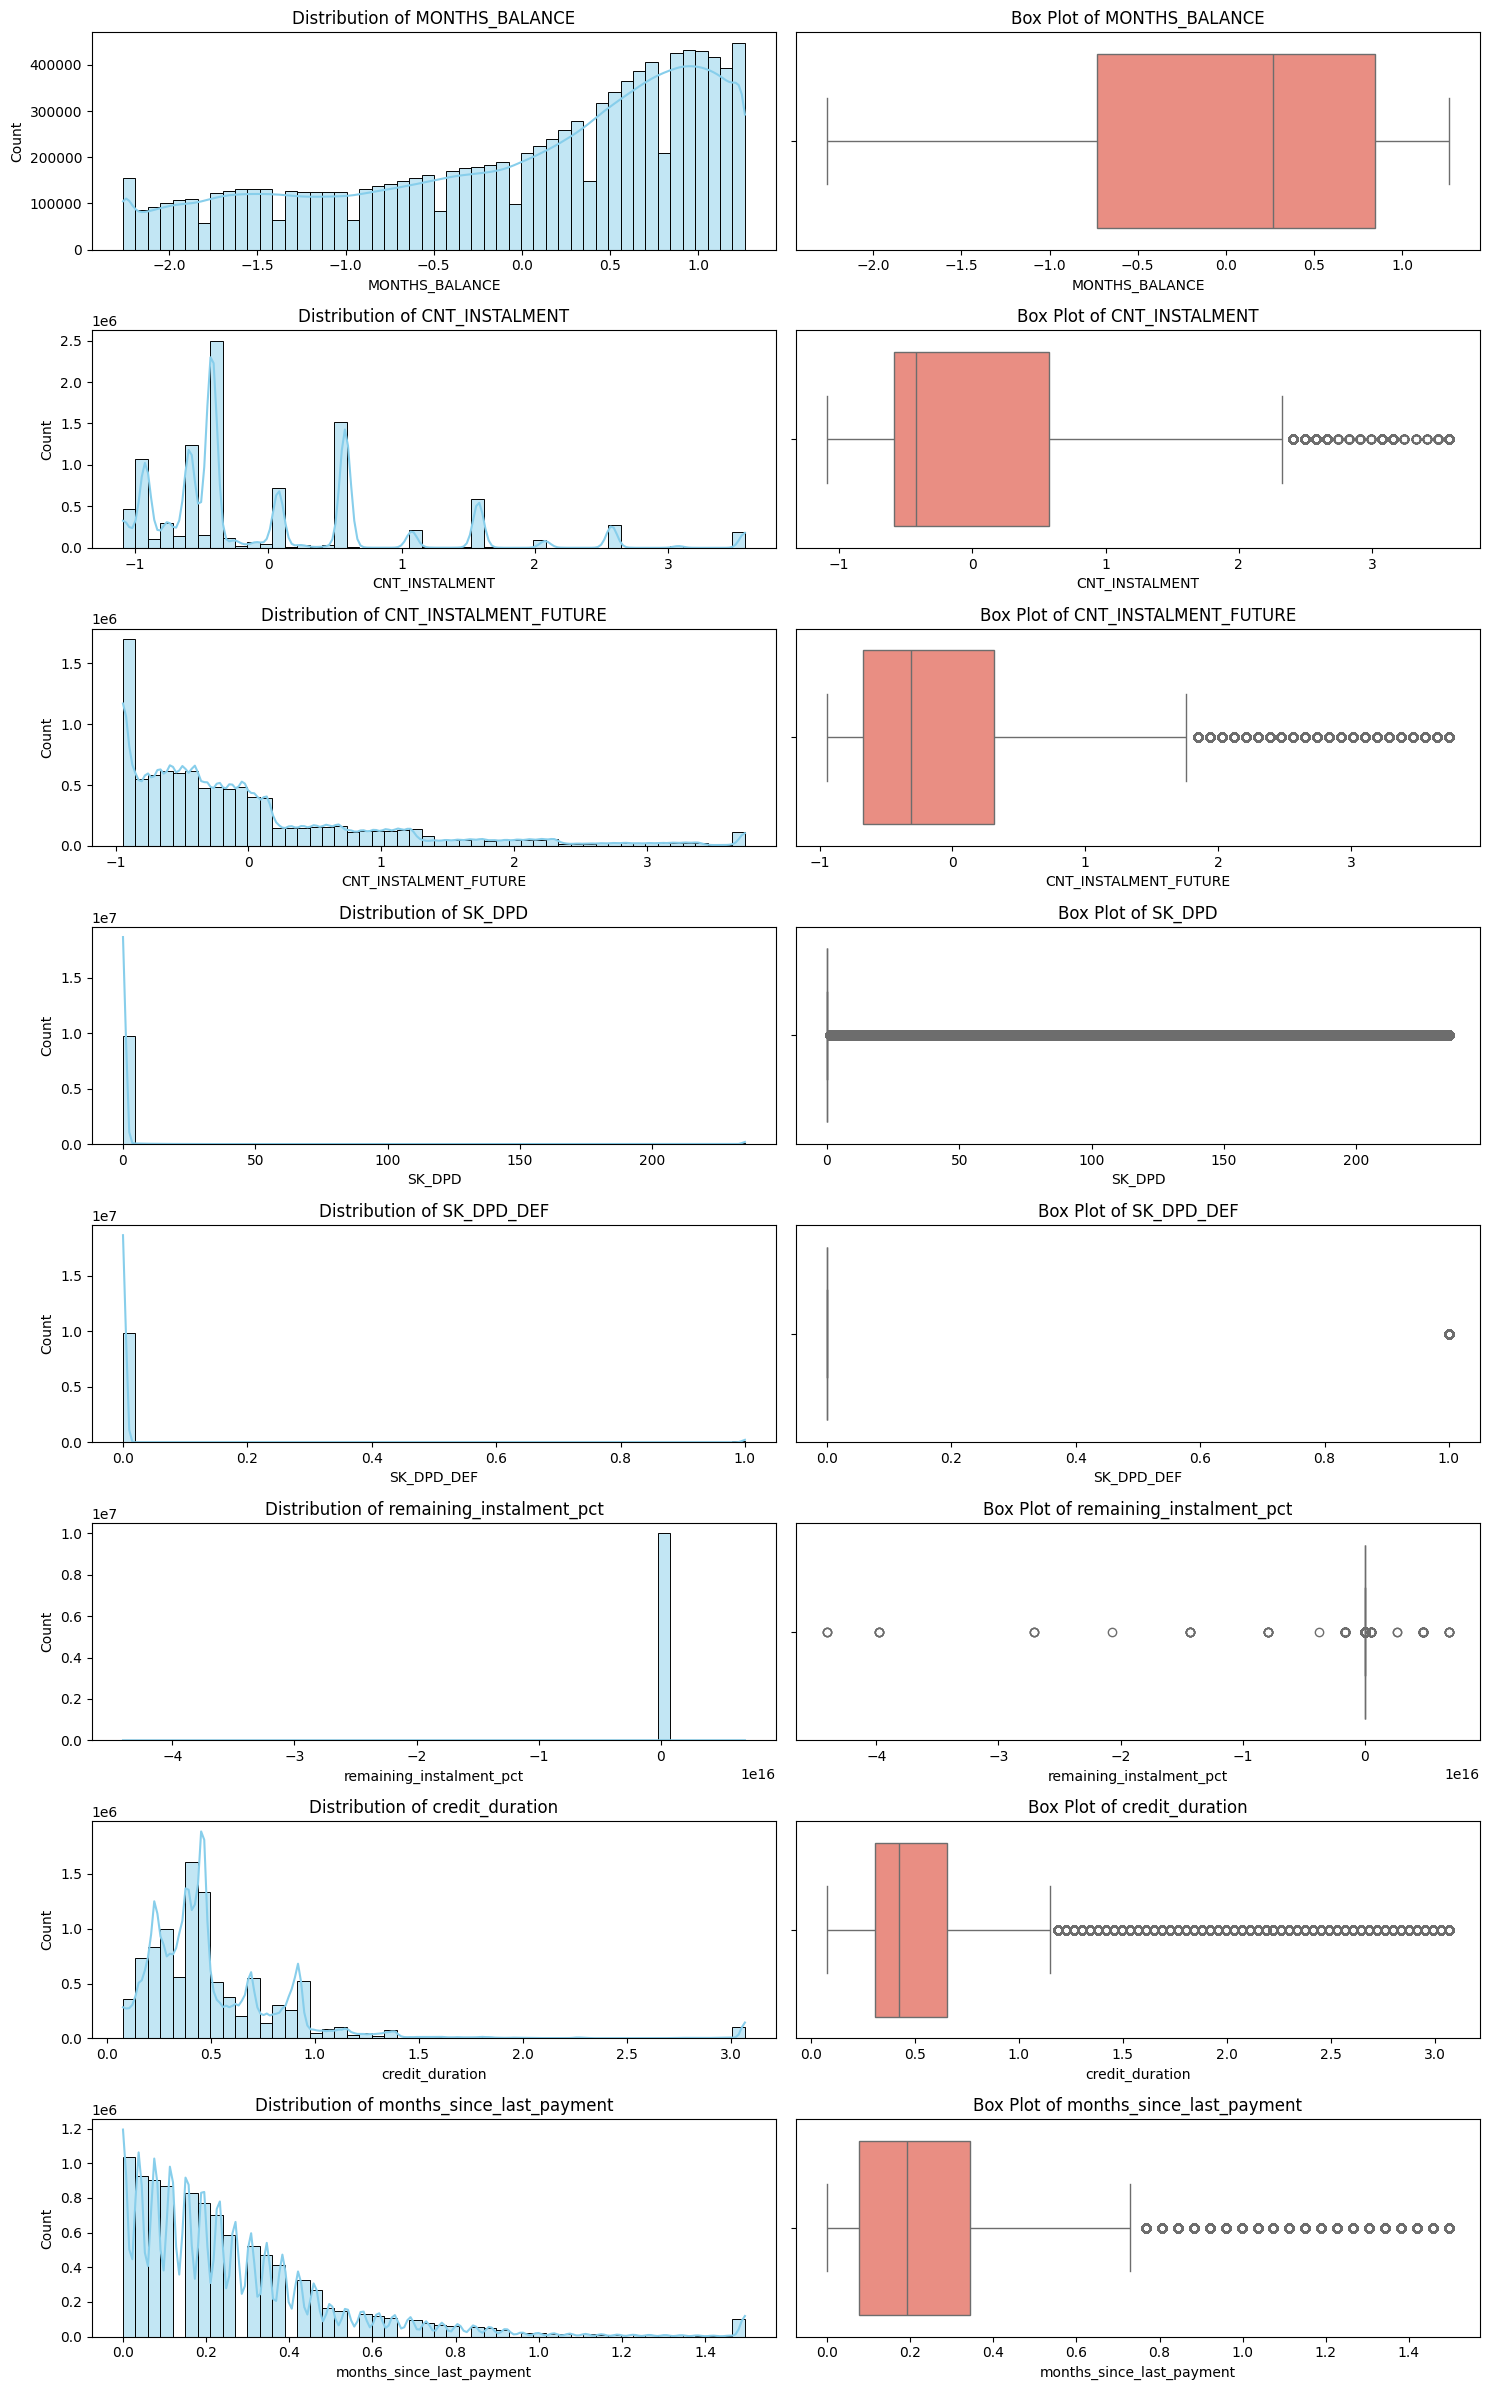

MONTHS_BALANCE                -0.670934
CNT_INSTALMENT                 1.609024
CNT_INSTALMENT_FUTURE          1.743297
SK_DPD                         9.088606
SK_DPD_DEF                     9.206879
remaining_instalment_pct    -826.072592
credit_duration                3.309377
months_since_last_payment      2.053437
dtype: float64

In [114]:
# Define number of rows and columns
n_features = len(features)
fig, axes = plt.subplots(n_features, 2, figsize=(15, n_features * 3))  # Adjust figure size for readability

for i, feature in enumerate(features):
    # Distribution Plot
    sns.histplot(data[feature], kde=True, color='skyblue', bins=50, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {feature}')
    
    # Box Plot
    sns.boxplot(x=data[feature], color='salmon', ax=axes[i, 1])
    axes[i, 1].set_title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

# Calculating skewness
skewness = data[features].skew()
skewness

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 17 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   SK_ID_PREV                     int64  
 1   SK_ID_CURR                     int64  
 2   MONTHS_BALANCE                 float64
 3   CNT_INSTALMENT                 float64
 4   CNT_INSTALMENT_FUTURE          float64
 5   NAME_CONTRACT_STATUS           object 
 6   SK_DPD                         int64  
 7   SK_DPD_DEF                     int64  
 8   remaining_instalment_pct       float64
 9   credit_duration                float64
 10  months_since_last_payment      float64
 11  CNT_INSTALMENT_LOG             float64
 12  CNT_INSTALMENT_FUTURE_LOG      float64
 13  SK_DPD_LOG                     float64
 14  SK_DPD_DEF_LOG                 float64
 15  credit_duration_LOG            float64
 16  months_since_last_payment_LOG  float64
dtypes: float64(12), int64(4), object(1)
memory u

## Drop Unnecessary Features

### Using Heatmap for Redudancy

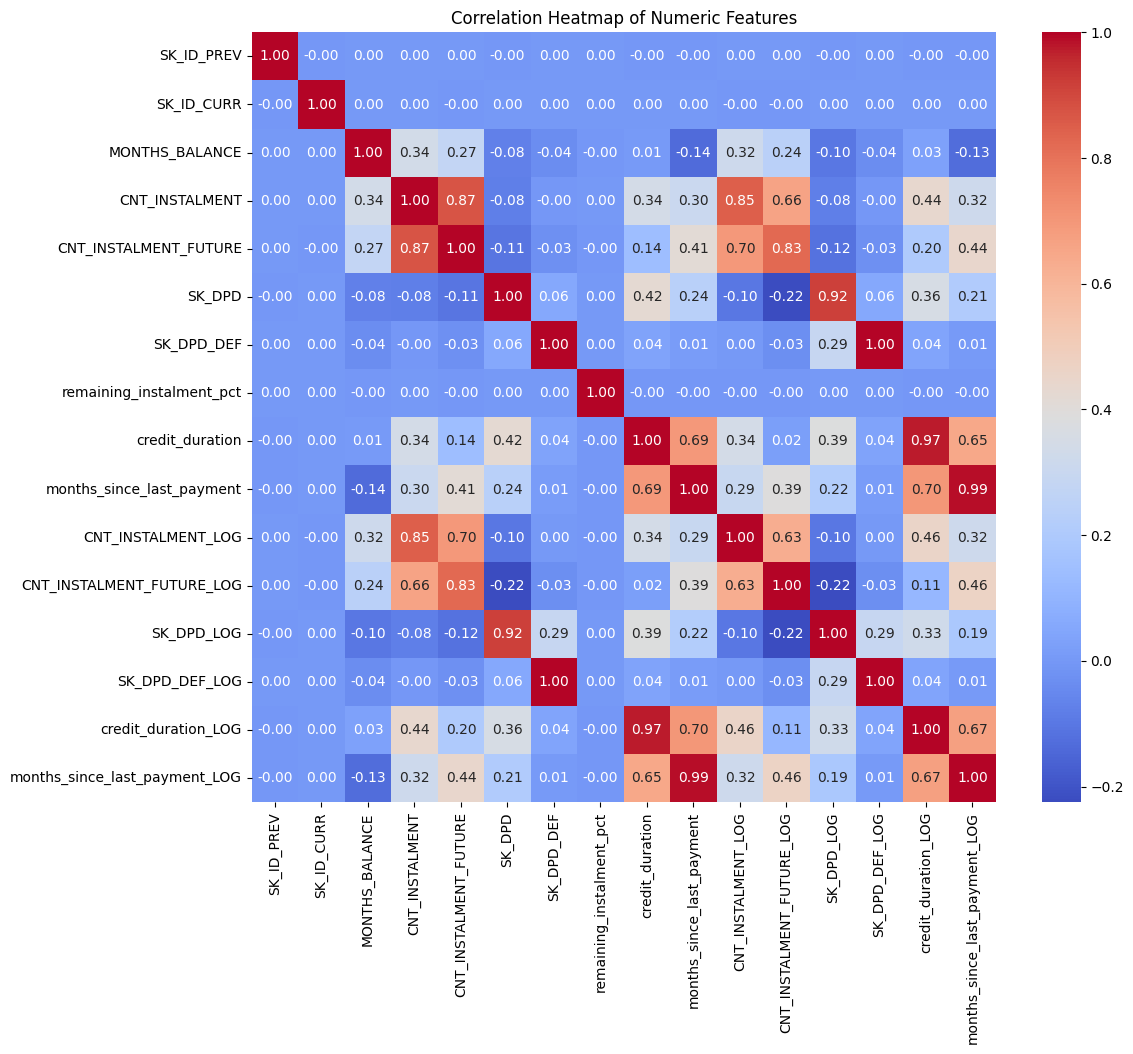

In [118]:
# Select only numeric features
numeric_features = data.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_features.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

Based on the heatmap, certain features have high correlations with each other, which may suggest redundancy. Features that could be candidates for removal based on strong correlations (> 0.8):

1. CNT_INSTALMENT_FUTURE_LOG and CNT_INSTALMENT_FUTURE: These two are highly correlated with each other (0.83). Retaining only the log-transformed version if it improves model performance.

2. credit_duration and credit_duration_LOG: With a high correlation (0.97), it’s reasonable to keep only one of these. Retaining credit_duration_LOG.

3. months_since_last_payment and months_since_last_payment_LOG: These are nearly identical (0.99 correlation). Retaining the log-transformed version (months_since_last_payment_LOG).

4. CNT_INSTALMENT_LOG and CNT_INSTALMENT: With a high correlation of 0.87. Retaining only CNT_INSTALMENT_LOG.

### Dropping

In [120]:
# Dropping redundant features
redundant_features = [
    'CNT_INSTALMENT_FUTURE', 
    'credit_duration', 
    'months_since_last_payment', 
    'CNT_INSTALMENT'
]

data = data.drop(columns=redundant_features)

print("Remaining columns after dropping redundant features:")
print(data.columns)

Remaining columns after dropping redundant features:
Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'NAME_CONTRACT_STATUS',
       'SK_DPD', 'SK_DPD_DEF', 'remaining_instalment_pct',
       'CNT_INSTALMENT_LOG', 'CNT_INSTALMENT_FUTURE_LOG', 'SK_DPD_LOG',
       'SK_DPD_DEF_LOG', 'credit_duration_LOG',
       'months_since_last_payment_LOG'],
      dtype='object')


## One-Hot Encoding

In [122]:
# Apply one-hot encoding to categorical features
categorical_features = ['NAME_CONTRACT_STATUS']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Display the new columns after encoding
print("Data columns after one-hot encoding:")
print(data.columns)

Data columns after one-hot encoding:
Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'SK_DPD', 'SK_DPD_DEF',
       'remaining_instalment_pct', 'CNT_INSTALMENT_LOG',
       'CNT_INSTALMENT_FUTURE_LOG', 'SK_DPD_LOG', 'SK_DPD_DEF_LOG',
       'credit_duration_LOG', 'months_since_last_payment_LOG',
       'NAME_CONTRACT_STATUS_Amortized debt', 'NAME_CONTRACT_STATUS_Approved',
       'NAME_CONTRACT_STATUS_Canceled', 'NAME_CONTRACT_STATUS_Completed',
       'NAME_CONTRACT_STATUS_Demand',
       'NAME_CONTRACT_STATUS_Returned to the store',
       'NAME_CONTRACT_STATUS_Signed', 'NAME_CONTRACT_STATUS_XNA'],
      dtype='object')


In [130]:
# Export to CSV
data.to_csv('POS_CASH_balance_preprocessed.csv', index=False)

# IGNORE THESE CODES BELOW, I WAS JUST MESSING AROUND. AND THE DATA AIN'T CLEAN NOR IT HAS ADDITIONAL FEATURES

## Merging with 'TARGET'

In [51]:
df_train = pd.read_csv('application_train.csv')
print(df_train.head())

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0             

In [53]:
df_to_merge = df_train.filter(items = df_train.columns[:2])
df_to_merge.head()

,SK_ID_CURR,TARGET
0,100002,1
1,100003,0
2,100004,0
3,100006,0
4,100007,0


In [55]:
df_merged = data.merge(df_to_merge, on='SK_ID_CURR', how='inner')
df_merged.sample(5, random_state = 0)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,CNT_INSTALMENT_LOG,CNT_INSTALMENT_FUTURE_LOG,TARGET
4503319,2226086,261351,-0.229697,Active,0,0,-2.583868,-1.119847,0
5836165,1659783,270319,0.460843,Active,0,0,NaN,-1.922120,0
5827086,2372103,176225,0.844476,Active,0,0,0.454953,0.569055,0
6011920,2712639,314653,0.691023,Active,0,0,-2.583868,-2.877418,0
7721485,2816696,426818,-0.958600,Active,0,0,NaN,-1.922120,0


In [57]:
df_merged.isnull().sum()

SK_ID_PREV                        0
SK_ID_CURR                        0
MONTHS_BALANCE                    0
NAME_CONTRACT_STATUS              0
SK_DPD                            0
SK_DPD_DEF                        0
CNT_INSTALMENT_LOG           404118
CNT_INSTALMENT_FUTURE_LOG         0
TARGET                            0
dtype: int64

In [59]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Convert boolean columns to integers (0 and 1)
df_merged = df_merged.astype({col: 'int64' for col in df_merged.select_dtypes(include=['bool']).columns})

In [61]:
df_merged.isnull().sum()

SK_ID_PREV                        0
SK_ID_CURR                        0
MONTHS_BALANCE                    0
NAME_CONTRACT_STATUS              0
SK_DPD                            0
SK_DPD_DEF                        0
CNT_INSTALMENT_LOG           404118
CNT_INSTALMENT_FUTURE_LOG         0
TARGET                            0
dtype: int64

In [67]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Separate features and target variable
X = df_merged.drop(columns=['TARGET'])  # drop the target variable
y = df_merged['TARGET']

# Use One-Hot Encoding for categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Impute missing values in X_encoded
imputer = SimpleImputer(strategy='mean')
X_encoded = imputer.fit_transform(X_encoded)

# After imputation, convert X_encoded back to a DataFrame with the correct column names
X_encoded = pd.DataFrame(X_encoded, columns=pd.get_dummies(X, drop_first=True).columns)

# Get the feature names
feature_names = X_encoded.columns

# Print the feature names
print("Features used in training:")
for feature in feature_names:
    print(feature)

Features used in training:
SK_ID_PREV
SK_ID_CURR
MONTHS_BALANCE
SK_DPD
SK_DPD_DEF
CNT_INSTALMENT_LOG
CNT_INSTALMENT_FUTURE_LOG
NAME_CONTRACT_STATUS_Amortized debt
NAME_CONTRACT_STATUS_Approved
NAME_CONTRACT_STATUS_Canceled
NAME_CONTRACT_STATUS_Completed
NAME_CONTRACT_STATUS_Demand
NAME_CONTRACT_STATUS_Returned to the store
NAME_CONTRACT_STATUS_Signed
NAME_CONTRACT_STATUS_XNA


In [69]:
X_encoded.isnull().sum()

SK_ID_PREV                                    0
SK_ID_CURR                                    0
MONTHS_BALANCE                                0
SK_DPD                                        0
SK_DPD_DEF                                    0
CNT_INSTALMENT_LOG                            0
CNT_INSTALMENT_FUTURE_LOG                     0
NAME_CONTRACT_STATUS_Amortized debt           0
NAME_CONTRACT_STATUS_Approved                 0
NAME_CONTRACT_STATUS_Canceled                 0
NAME_CONTRACT_STATUS_Completed                0
NAME_CONTRACT_STATUS_Demand                   0
NAME_CONTRACT_STATUS_Returned to the store    0
NAME_CONTRACT_STATUS_Signed                   0
NAME_CONTRACT_STATUS_XNA                      0
dtype: int64

In [93]:
print(y.isnull().sum())

0


In [71]:
# Now, to apply SMOTE to dis nigga
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

# Check the new distribution after SMOTE
print(f"Original dataset size: {len(y)}")
print(f"Resampled dataset size: {len(y_resampled)}")

Original dataset size: 8543375
Resampled dataset size: 15829578


In [73]:
# Check the original class distribution
print("Original class distribution:")
print(y.value_counts())

# Check the resampled class distribution after SMOTE
print("\nResampled class distribution:")
print(pd.Series(y_resampled).value_counts())

Original class distribution:
TARGET
0    7914789
1     628586
Name: count, dtype: int64

Resampled class distribution:
TARGET
0    7914789
1    7914789
Name: count, dtype: int64


## Modelling using Default Data

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Split the resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")

Confusion Matrix:
[[2370925    2374]
 [ 158833 2216742]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97   2373299
           1       1.00      0.93      0.96   2375575

    accuracy                           0.97   4748874
   macro avg       0.97      0.97      0.97   4748874
weighted avg       0.97      0.97      0.97   4748874


Accuracy: 96.61%


Important Features:
                                       Feature    Importance
6                    CNT_INSTALMENT_FUTURE_LOG  5.049265e-01
2                               MONTHS_BALANCE  1.450527e-01
1                                   SK_ID_CURR  1.302974e-01
0                                   SK_ID_PREV  1.284353e-01
10              NAME_CONTRACT_STATUS_Completed  4.939652e-02
5                           CNT_INSTALMENT_LOG  2.088865e-02
3                                       SK_DPD  8.926661e-03
13                 NAME_CONTRACT_STATUS_Signed  7.270687e-03
4                                   SK_DPD_DEF  3.494751e-03
12  NAME_CONTRACT_STATUS_Returned to the store  5.261244e-04
8                NAME_CONTRACT_STATUS_Approved  4.025992e-04
11                 NAME_CONTRACT_STATUS_Demand  3.080836e-04
7          NAME_CONTRACT_STATUS_Amortized debt  7.233836e-05
9                NAME_CONTRACT_STATUS_Canceled  1.534005e-06
14                    NAME_CONTRACT_STATUS_XNA  2.352988e-07


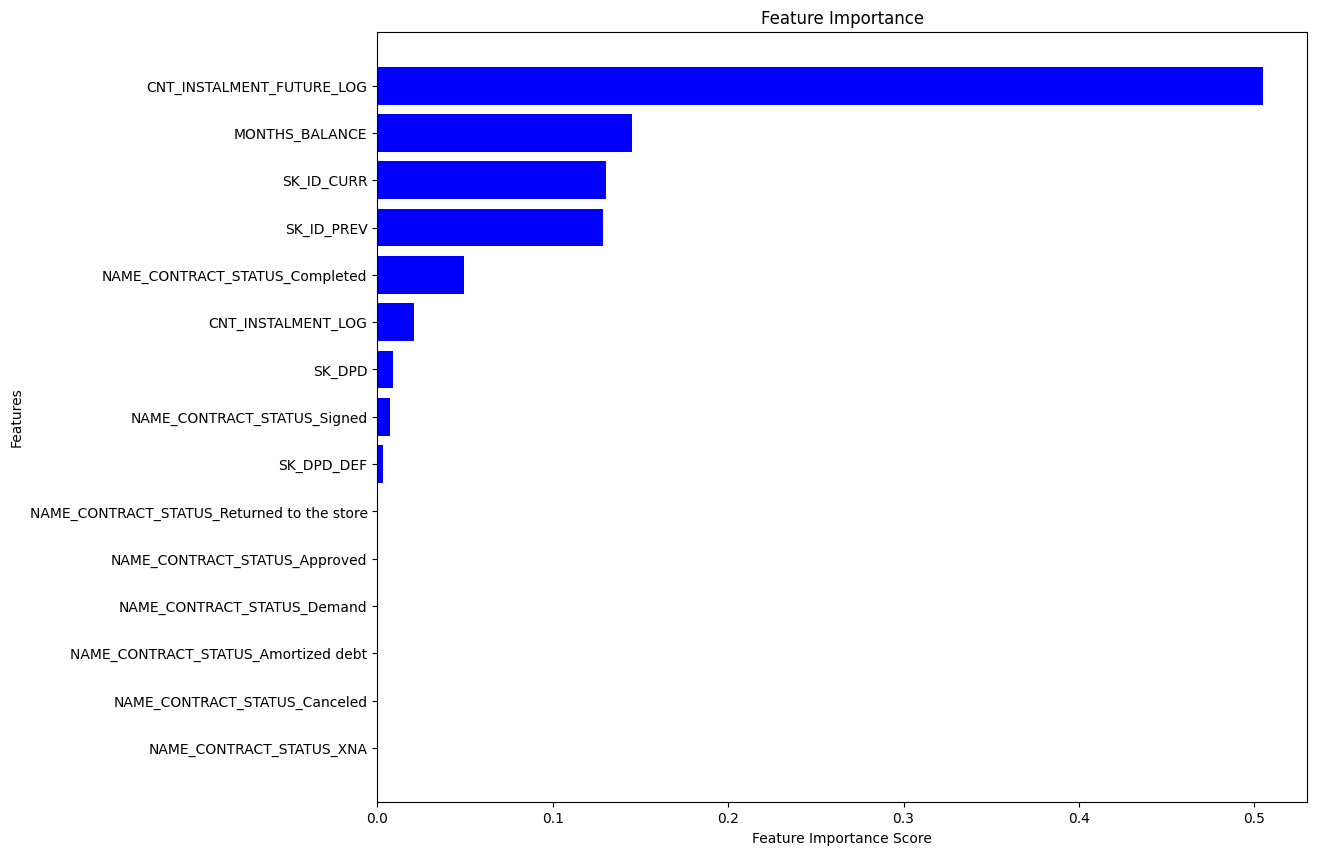

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Updated features used in training
feature_names = [
    'SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'SK_DPD', 'SK_DPD_DEF',
    'CNT_INSTALMENT_LOG', 'CNT_INSTALMENT_FUTURE_LOG',
    'NAME_CONTRACT_STATUS_Amortized debt', 'NAME_CONTRACT_STATUS_Approved',
    'NAME_CONTRACT_STATUS_Canceled', 'NAME_CONTRACT_STATUS_Completed',
    'NAME_CONTRACT_STATUS_Demand', 'NAME_CONTRACT_STATUS_Returned to the store',
    'NAME_CONTRACT_STATUS_Signed', 'NAME_CONTRACT_STATUS_XNA'
]

# Get feature importance
feature_importance = rf_model.feature_importances_

# Create a DataFrame to hold the feature importance values
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,  # Use the provided feature names
    'Importance': feature_importance
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 important features
print("Important Features:")
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(12, 10))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='blue')
plt.gca().invert_yaxis()  # To have the most important feature on top
plt.title('Feature Importance')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

In [80]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
print("Logistic Regression:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logistic))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logistic))
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
print(f"Accuracy: {logistic_accuracy * 100:.2f}%\n")

Logistic Regression:
Confusion Matrix:
[[1231503 1141796]
 [1151485 1224090]]

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.52      0.52   2373299
           1       0.52      0.52      0.52   2375575

    accuracy                           0.52   4748874
   macro avg       0.52      0.52      0.52   4748874
weighted avg       0.52      0.52      0.52   4748874

Accuracy: 51.71%



Important Features:
                                       Feature    Importance
6                    CNT_INSTALMENT_FUTURE_LOG  7.125872e-02
2                               MONTHS_BALANCE  3.478518e-02
5                           CNT_INSTALMENT_LOG  3.283260e-02
10              NAME_CONTRACT_STATUS_Completed  1.112662e-02
13                 NAME_CONTRACT_STATUS_Signed  1.017603e-03
4                                   SK_DPD_DEF  4.429907e-04
3                                       SK_DPD  3.457878e-04
11                 NAME_CONTRACT_STATUS_Demand  1.161252e-04
8                NAME_CONTRACT_STATUS_Approved  8.327187e-05
7          NAME_CONTRACT_STATUS_Amortized debt  4.120225e-05
12  NAME_CONTRACT_STATUS_Returned to the store  2.277741e-05
14                    NAME_CONTRACT_STATUS_XNA  1.885068e-07
0                                   SK_ID_PREV  1.912437e-08
9                NAME_CONTRACT_STATUS_Canceled  1.799322e-08
1                                   SK_ID_CURR  4.254106e-09


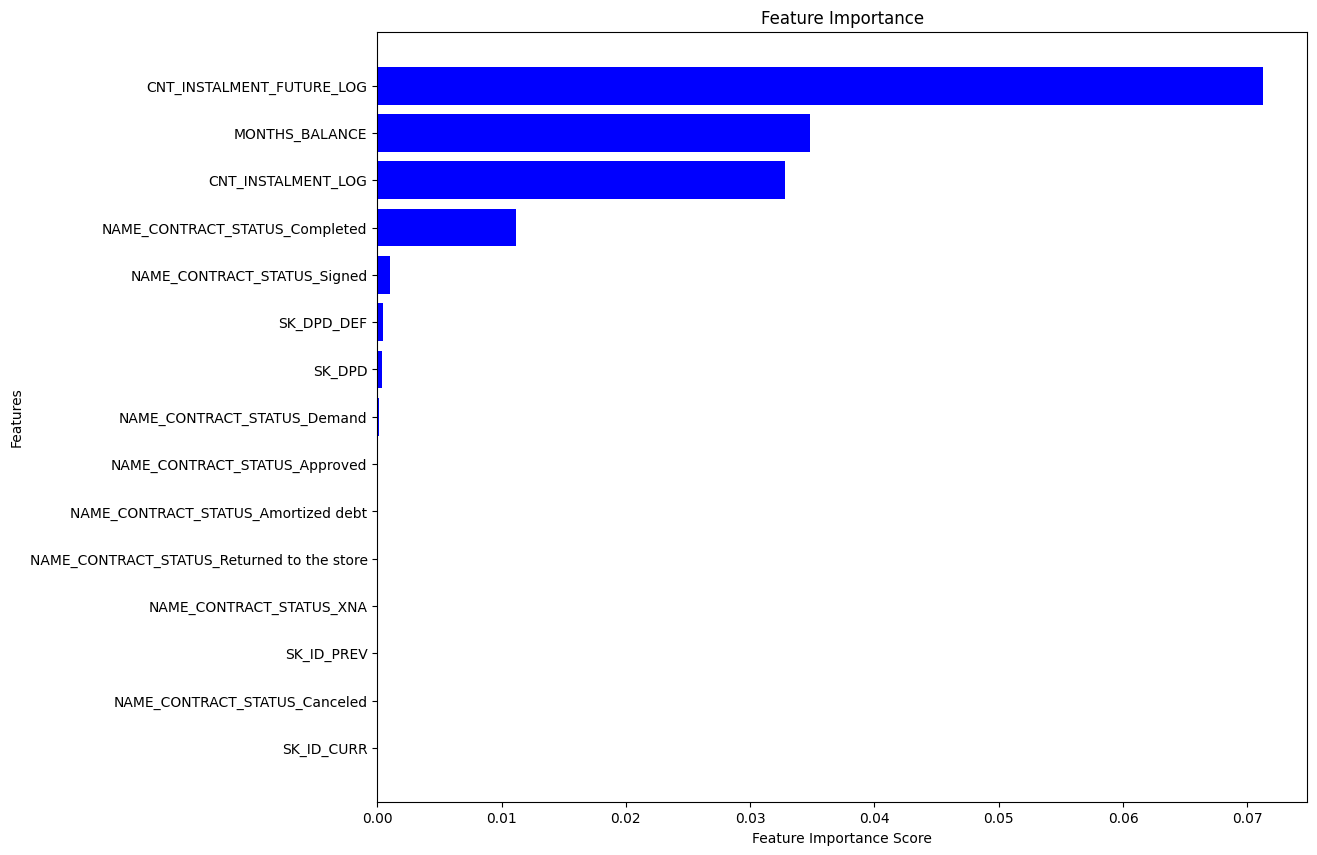

In [88]:
feature_names = [
    'SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'SK_DPD', 'SK_DPD_DEF',
    'CNT_INSTALMENT_LOG', 'CNT_INSTALMENT_FUTURE_LOG',
    'NAME_CONTRACT_STATUS_Amortized debt', 'NAME_CONTRACT_STATUS_Approved',
    'NAME_CONTRACT_STATUS_Canceled', 'NAME_CONTRACT_STATUS_Completed',
    'NAME_CONTRACT_STATUS_Demand', 'NAME_CONTRACT_STATUS_Returned to the store',
    'NAME_CONTRACT_STATUS_Signed', 'NAME_CONTRACT_STATUS_XNA'
]

# Get feature importance using coefficients from logistic regression model
feature_importance = np.abs(logistic_model.coef_[0])  # Take absolute value of coefficients

# Create a DataFrame to hold the feature importance values
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 important features
print("Important Features:")
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(12, 10))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='blue')
plt.gca().invert_yaxis()  # To have the most important feature on top
plt.title('Feature Importance')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

In [82]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print("Gradient Boosting:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb))
gb_accuracy = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy: {gb_accuracy * 100:.2f}%\n")

Gradient Boosting:
Confusion Matrix:
[[2062290  311009]
 [ 292156 2083419]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87   2373299
           1       0.87      0.88      0.87   2375575

    accuracy                           0.87   4748874
   macro avg       0.87      0.87      0.87   4748874
weighted avg       0.87      0.87      0.87   4748874

Accuracy: 87.30%



Important Features:
                                       Feature  Importance
6                    CNT_INSTALMENT_FUTURE_LOG    0.813740
10              NAME_CONTRACT_STATUS_Completed    0.123018
2                               MONTHS_BALANCE    0.042123
13                 NAME_CONTRACT_STATUS_Signed    0.011471
3                                       SK_DPD    0.008423
1                                   SK_ID_CURR    0.000587
5                           CNT_INSTALMENT_LOG    0.000326
0                                   SK_ID_PREV    0.000152
4                                   SK_DPD_DEF    0.000105
11                 NAME_CONTRACT_STATUS_Demand    0.000056
7          NAME_CONTRACT_STATUS_Amortized debt    0.000000
8                NAME_CONTRACT_STATUS_Approved    0.000000
9                NAME_CONTRACT_STATUS_Canceled    0.000000
12  NAME_CONTRACT_STATUS_Returned to the store    0.000000
14                    NAME_CONTRACT_STATUS_XNA    0.000000


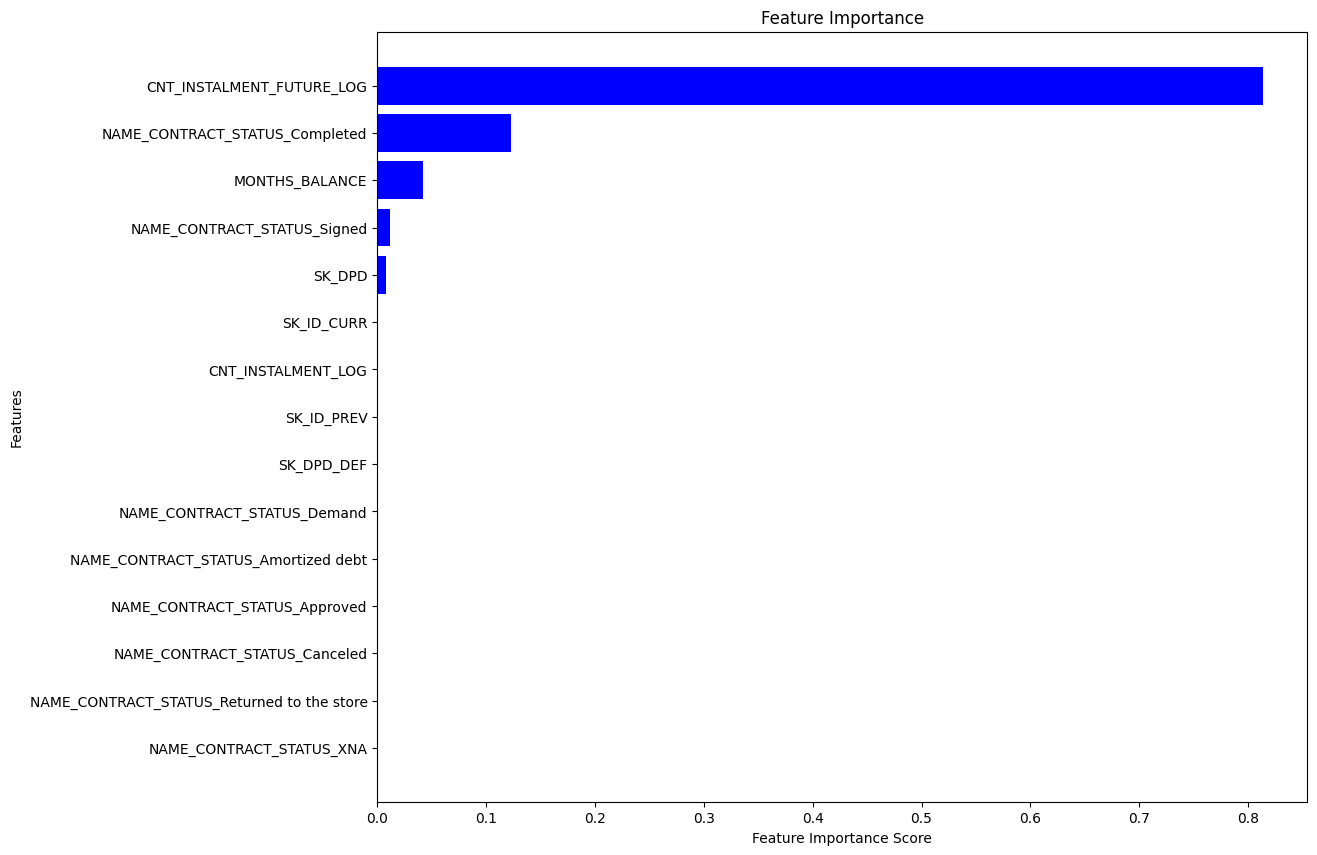

In [90]:
feature_names = [
    'SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'SK_DPD', 'SK_DPD_DEF',
    'CNT_INSTALMENT_LOG', 'CNT_INSTALMENT_FUTURE_LOG',
    'NAME_CONTRACT_STATUS_Amortized debt', 'NAME_CONTRACT_STATUS_Approved',
    'NAME_CONTRACT_STATUS_Canceled', 'NAME_CONTRACT_STATUS_Completed',
    'NAME_CONTRACT_STATUS_Demand', 'NAME_CONTRACT_STATUS_Returned to the store',
    'NAME_CONTRACT_STATUS_Signed', 'NAME_CONTRACT_STATUS_XNA'
]

# Get feature importance
feature_importance = gb_model.feature_importances_

# Create a DataFrame to hold the feature importance values
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,  # Use the provided feature names
    'Importance': feature_importance
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 important features
print("Important Features:")
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(12, 10))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='blue')
plt.gca().invert_yaxis()  # To have the most important feature on top
plt.title('Feature Importance')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

In [84]:
import xgboost as xgb

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {xgb_accuracy * 100:.2f}%\n")

C:\Users\brama\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:54:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost:
Confusion Matrix:
[[2356345   16954]
 [ 326637 2048938]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93   2373299
           1       0.99      0.86      0.92   2375575

    accuracy                           0.93   4748874
   macro avg       0.94      0.93      0.93   4748874
weighted avg       0.94      0.93      0.93   4748874

Accuracy: 92.76%



Important Features:
                                       Feature  Importance
6                    CNT_INSTALMENT_FUTURE_LOG    0.334964
10              NAME_CONTRACT_STATUS_Completed    0.291964
2                               MONTHS_BALANCE    0.150126
8                NAME_CONTRACT_STATUS_Approved    0.050793
13                 NAME_CONTRACT_STATUS_Signed    0.046454
4                                   SK_DPD_DEF    0.022658
12  NAME_CONTRACT_STATUS_Returned to the store    0.021587
5                           CNT_INSTALMENT_LOG    0.020787
3                                       SK_DPD    0.019835
11                 NAME_CONTRACT_STATUS_Demand    0.017136
7          NAME_CONTRACT_STATUS_Amortized debt    0.009187
0                                   SK_ID_PREV    0.006671
1                                   SK_ID_CURR    0.006500
9                NAME_CONTRACT_STATUS_Canceled    0.001339
14                    NAME_CONTRACT_STATUS_XNA    0.000000


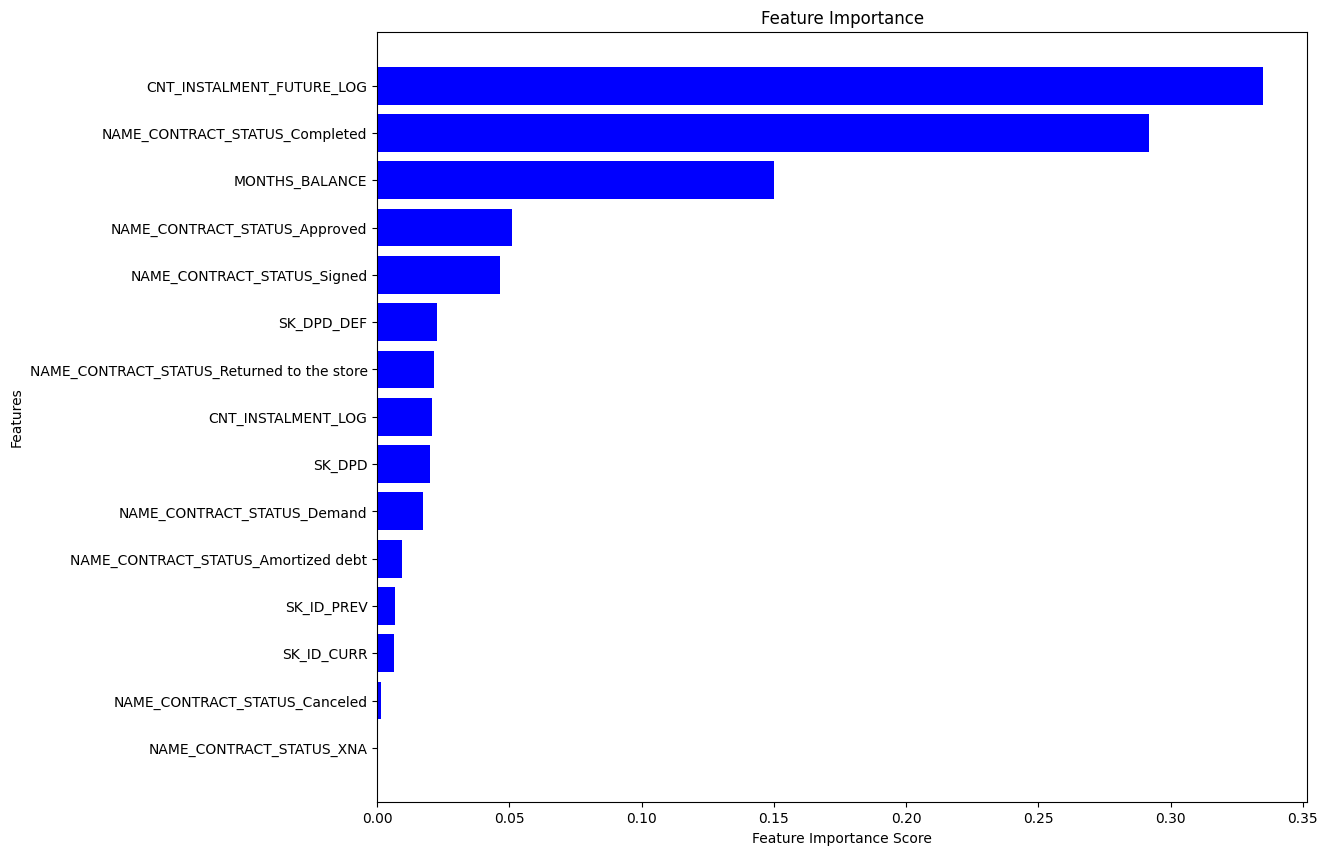

In [92]:
feature_names = [
    'SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'SK_DPD', 'SK_DPD_DEF',
    'CNT_INSTALMENT_LOG', 'CNT_INSTALMENT_FUTURE_LOG',
    'NAME_CONTRACT_STATUS_Amortized debt', 'NAME_CONTRACT_STATUS_Approved',
    'NAME_CONTRACT_STATUS_Canceled', 'NAME_CONTRACT_STATUS_Completed',
    'NAME_CONTRACT_STATUS_Demand', 'NAME_CONTRACT_STATUS_Returned to the store',
    'NAME_CONTRACT_STATUS_Signed', 'NAME_CONTRACT_STATUS_XNA'
]

# Get feature importance
feature_importance = xgb_model.feature_importances_

# Create a DataFrame to hold the feature importance values
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,  # Use the provided feature names
    'Importance': feature_importance
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 important features
print("Important Features:")
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(12, 10))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='blue')
plt.gca().invert_yaxis()  # To have the most important feature on top
plt.title('Feature Importance')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()